<a href="https://colab.research.google.com/github/michaelojy85/mojy85.github.io/blob/master/StageC_Graded_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
rgsr_df = df.drop(columns='stabf')
df = df.drop(columns='stab')

In [ ]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stabf    0
dtype: int64

In [ ]:
df.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stabf     object
dtype: object

# Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score, plot_roc_curve
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [ ]:
features = df[df.columns[:-1]]
labels = df[df.columns[-1]]
features.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [ ]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [ ]:
X_sc.shape

(8000, 12)

In [ ]:
df.shape

(10000, 13)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rforest_clf = RandomForestClassifier()
xTree_clf = ExtraTreesClassifier()

In [ ]:
rforest_clf.fit(X_sc, y_train)
xTree_clf.fit(X_sc, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
randomforest_pred = rforest_clf.predict(X_test)
xTree_pred = xTree_clf.predict(X_test)

In [ ]:
# Random Forest
print(confusion_matrix(y_test, randomforest_pred))
print(classification_report(y_test, randomforest_pred))
print(round(accuracy_score(y_test, randomforest_pred),4))

[[ 623   89]
 [  58 1230]]
              precision    recall  f1-score   support

      stable       0.91      0.88      0.89       712
    unstable       0.93      0.95      0.94      1288

    accuracy                           0.93      2000
   macro avg       0.92      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000

0.9265


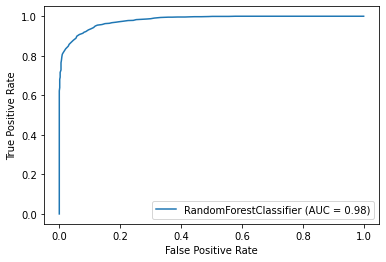

In [ ]:
plot_roc_curve(rforest_clf, X_test, 
               y_test, response_method='predict_proba')

In [ ]:
# True positive label
pos_label = 'stable'

In [ ]:
# calculate the percentage of positive predicted value.
precision = precision_score(y_true=y_test, y_pred=randomforest_pred, 
                            pos_label=pos_label)
recall = recall_score(y_true=y_test, y_pred=randomforest_pred, 
                      pos_label=pos_label)
f1 = f1_score(y_true=y_test, y_pred=randomforest_pred, 
              pos_label=pos_label)

print('Precision: {}'.format(round(precision*100), 2)) #prints 41.0
print('Recall: {}'.format(round(recall*100), 2)) #prints 81.0 
print('F1: {}'.format(round(f1*100), 2)) #prints 45.0

Precision: 91.0
Recall: 88.0
F1: 89.0


In [ ]:
# Extra Tree
print(confusion_matrix(y_test, xTree_pred))
print(classification_report(y_test, xTree_pred))
print(accuracy_score(y_test, xTree_pred))

[[ 589  123]
 [  34 1254]]
              precision    recall  f1-score   support

      stable       0.95      0.83      0.88       712
    unstable       0.91      0.97      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.93      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000

0.9215


In [ ]:
# calculate the percentage of positive predicted value.
precision = precision_score(y_true=y_test, y_pred=xTree_pred, 
                            pos_label=pos_label)
recall = recall_score(y_true=y_test, y_pred=xTree_pred, 
                      pos_label=pos_label)
f1 = f1_score(y_true=y_test, y_pred=xTree_pred, 
              pos_label=pos_label)

print('Precision: {}'.format(round(precision*100), 2)) #prints 41.0
print('Recall: {}'.format(round(recall*100), 2)) #prints 81.0 
print('F1: {}'.format(round(f1*100), 2)) #prints 45.0

Precision: 95.0
Recall: 83.0
F1: 88.0


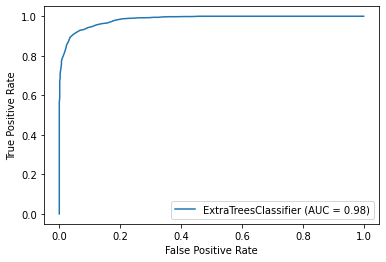

In [ ]:
plot_roc_curve(xTree_clf, X_test, 
               y_test, response_method='predict_proba')

In [ ]:
def plotting_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1],
                                                c=".7")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def auc_roc_curve(model, x_test, y_test):

    # Predict the probabilities of the test data
    probs = model.predict_proba(x_test)
    

    # keep only the positive class
    pos_probs = probs[:,1]
    #print(probs)

    # Compute the auc score
    auc = roc_auc_score(y_test, pos_probs)
    print('AUC: %.2f' % auc)

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, pos_probs, 
                                     pos_label = '3A')

    plotting_roc_curve(fpr, tpr)

In [ ]:
import xgboost as xgb
import lightgbm as lgb

#LEncoder = LabelEncoder()
#LEn_train = LEncoder.fit_transform(y_train)
#LEn_test = LEncoder.fit_transform(y_test)

d = {'stable':1, 'unstable':0}
LEn_train = y_train.map(d) # mapping 1 to 'stable' while 'unstable' to 0.
LEn_test = y_test.map(d)

In [ ]:
# converting the dataset into XGB format
dtrain = xgb.DMatrix(X_sc, label = LEn_train)
dtest = xgb.DMatrix(X_test, label=LEn_test)

#converting the dataset into proper LGB format 
l_train=lgb.Dataset(X_sc, label=LEn_train)

In [ ]:
#Specifying the parameter
xgb_params = { 
                'max_depth': 4,
                'eta': 0.3,
                'objectives': 'multi:softmax',
                'num_class': 2,
            }
epochs = 10

#Specifying the parameter
lgb_params = {
            'learning_rate': 0.03,
            'boosting_type': 'gbdt', #GradientBoostingDecisionTree
            'objective': 'binary', #Binary target feature
            'metric': 'binary_logloss', #metric for binary classification
            'max_depth': 10
       }

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_sc, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9195


In [ ]:

model = lgb.LGBMClassifier()
model.fit(X_sc, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9375


In [ ]:
#train the model 
xgb_model = xgb.train(xgb_params, dtrain, epochs)

lgb_model = lgb.train(lgb_params, l_train, epochs)

In [ ]:
xgb_pred = xgb_model.predict(dtest)
lgb_pred = lgb_model.predict(X_test)

In [ ]:
print(confusion_matrix(LEn_test, xgb_pred))
print(classification_report(LEn_test, xgb_pred))
print(accuracy_score(LEn_test, xgb_pred))

[[1216   72]
 [ 156  556]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1288
           1       0.89      0.78      0.83       712

    accuracy                           0.89      2000
   macro avg       0.89      0.86      0.87      2000
weighted avg       0.89      0.89      0.88      2000

0.886


In [ ]:
# calculate the percentage of positive predicted value.
precision = precision_score(y_true=LEn_test, y_pred=xgb_pred, 
                            pos_label=1)
recall = recall_score(y_true=LEn_test, y_pred=xgb_pred, 
                      pos_label=1)
f1 = f1_score(y_true=LEn_test, y_pred=xgb_pred, 
              pos_label=1)

print('Precision: {}'.format(round(precision*100), 2)) #prints 41.0
print('Recall: {}'.format(round(recall*100), 2)) #prints 81.0 
print('F1: {}'.format(round(f1*100), 2)) #prints 45.0

Precision: 89.0
Recall: 78.0
F1: 83.0


In [ ]:
#rounding the values
lgb_pred=lgb_pred.round(0)
#converting from float to integer
lgb_pred=lgb_pred.astype(int)

print(confusion_matrix(LEn_test, lgb_pred))
print(classification_report(LEn_test, lgb_pred))
print(accuracy_score(LEn_test, lgb_pred))

[[1286    2]
 [ 611  101]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      1288
           1       0.98      0.14      0.25       712

    accuracy                           0.69      2000
   macro avg       0.83      0.57      0.53      2000
weighted avg       0.79      0.69      0.61      2000

0.6935


In [ ]:
# calculate the percentage of positive predicted value.
precision = precision_score(y_true=LEn_test, y_pred=lgb_pred, 
                            pos_label=1)
recall = recall_score(y_true=LEn_test, y_pred=lgb_pred, 
                      pos_label=1)
f1 = f1_score(y_true=LEn_test, y_pred=lgb_pred, 
              pos_label=1)

print('Precision: {}'.format(round(precision*100), 2)) #prints 41.0
print('Recall: {}'.format(round(recall*100), 2)) #prints 81.0 
print('F1: {}'.format(round(f1*100), 2)) #prints 45.0

Precision: 98.0
Recall: 14.0
F1: 25.0


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

hyperparameter_grid = {
    'max_features'      : ['auto', 'sqrt', 'log2', None],
    'min_samples_leaf'  : [1, 2, 4, 6, 8],
    'min_samples_split' : [2, 3, 5, 7, 9],
    'n_estimators'      : [50, 100, 300, 500, 1000]
}# Create a based model

random_search = RandomizedSearchCV(estimator = ExtraTreesClassifier(), 
                                    param_distributions = hyperparameter_grid,
                                    n_iter=10, scoring = 'accuracy', 
                                    cv = 5, n_jobs = -1, verbose = 1, random_state=1)
random_search.fit(X_sc, y_train)

print("Best Estimator              : {}".format(random_search.best_estimator_))
print("Best Cross-Validation-Score : {}".format(random_search.best_score_))
print("Best Parameters             : {}".format(random_search.best_params_))
print("Best Index                  : {}".format(random_search.best_index_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


Best Estimator              : ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=None,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=8, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=1000,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
Best Cross-Validation-Score : 0.924
Best Parameters             : {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}
Best Index                  : 4


In [ ]:
# Building the model 
extra_tree_forest = ExtraTreesClassifier(random_state=1) 
  
# Training the model 
extra_tree_forest.fit(X_sc, y_train)

# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 
  

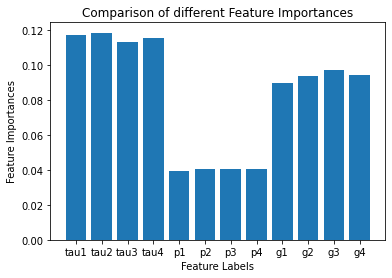

In [ ]:
# Plotting a Bar Graph to compare the models 
plt.bar(X_train.columns, feature_importance) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

In [ ]:
rgsr_df.corr(method='pearson')

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494,0.275761
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764,0.290975
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497,0.280700
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491,0.278576
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451,0.010278
p2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817,0.006255
p3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485,-0.003321
p4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505,-0.020786
g1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431,0.282774
g2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909,0.293601


Text(0.5, 1.0, 'Correlation Map for stability')

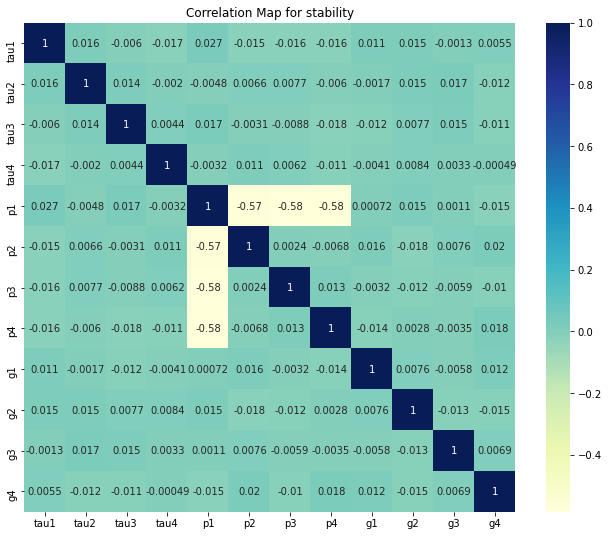

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(rgsr_df.drop(columns='stab').corr(),
            annot=True, 
            cmap="YlGnBu").set_title("Correlation Map for stability")

In [ ]:
lnr_feats = rgsr_df.drop(columns='stab')
lnr_labls = rgsr_df.stab 

In [ ]:
from sklearn.linear_model import LinearRegression

Xl_train, Xl_test, yl_train, yl_test = train_test_split(lnr_feats, 
                                                    lnr_labls, 
                                                    test_size=0.2, 
                                                    random_state=1)

lnr_scaler = StandardScaler()
xl_sc = lnr_scaler.fit_transform(Xl_train, yl_train)
xl_test = lnr_scaler.fit_transform( Xl_test, yl_test)
rgsr = LinearRegression().fit(xl_sc, yl_train)
yl_pred = rgsr.predict(xl_test)
rgsr.score(Xl_test,yl_test)


-1.3251392556480669e+25

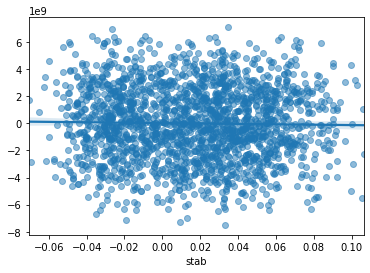

In [ ]:
sns.regplot(x=yl_test,y=yl_pred, scatter_kws={'alpha':0.5}) 

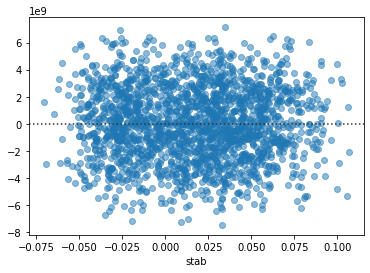

In [ ]:
sns.residplot(yl_test, yl_pred, scatter_kws={'alpha':0.5})

Text(0.5, 1.0, 'Stability values for each samples')

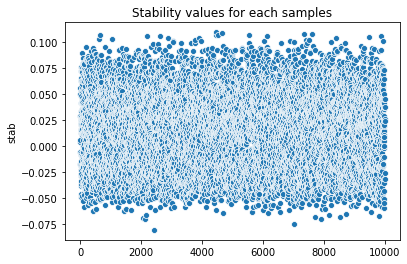

In [ ]:
sns.scatterplot(x=rgsr_df.index, y=rgsr_df.stab).set_title("Stability values for each samples")

In [ ]:
from sklearn import metrics

def metricsCalculations(actual_test, predicted, n=3):
    # n = 3 round up in n decimal digits
    yt=np.array(actual_test)
    pv= np.array(predicted)

    # Mean Absolute Error
    mae = round(metrics.mean_absolute_error(actual_test, predicted), n) 
    # Residual Sum of Squares  
    rss = round(np.sum(np.square(yt - pv)), n)   
    # Mean Squared Error
    mse = round(metrics.mean_squared_error(actual_test, predicted), n) 
    # Root Mean Squared Error 
    rmse = round(np.sqrt(metrics.mean_squared_error(actual_test, predicted)), n)  
    # R-Squared 
    r2score = round(metrics.r2_score(actual_test, predicted), n)    

    print('Mean Absolute Error    :', mae)
    print('Residual Sum of Squares:', rss)  
    print('Mean Squared Error     :', mse)  
    print('Root Mean Squared Error:', rmse)
    print('R-Squared              :', r2score)

metricsCalculations(yl_test, yl_pred)

Mean Absolute Error    : 2212995522.627
Residual Sum of Squares: 1.4623905950554445e+22
Mean Squared Error     : 7.311952975277223e+18
Root Mean Squared Error: 2704062309.799
R-Squared              : -5.632684500902722e+21


In [ ]:
import statsmodels.api as sm

'''
Add a constant. Essentially, we are adding a new column (equal in lenght to x), 
which consists only of 1s
'''
x = sm.add_constant(lnr_feats)

est2 = sm.OLS(lnr_labls, x).fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   stab   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     1664.
Date:                Mon, 24 Aug 2020   Prob (F-statistic):               0.00
Time:                        07:38:39   Log-Likelihood:                 24007.
No. Observations:               10000   AIC:                        -4.799e+04
Df Residuals:                    9988   BIC:                        -4.790e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1438      0.002    -89.055      0.000      -0.147      -0.141
tau1           0.0036   8.01e-05     45.275      0.000       0.003       0.004
tau2           0.0037   8.01e-05     46.677      0.000       0.004       0.004
tau3           0.0037   8.01e-05     46.552      0.000       0.004       0.004
tau4           0.0038   8.01e-05     47.135      0.000       0.004       0.004
p1          -1.61e-06      0.000     -0.007      0.994      -0.000       0.000
p2         -5.883e-05      0.000     -0.140      0.888      -0.001       0.001
p3             0.0007      0.000      1.736      0.083   -9.48e-05       0.002
p4            -0.0007      0.000     -1.598      0.110      -0.001       0.000
g1             0.0378      0.001     47.209      0.000       0.036       0.039
g2             0.0386      0.001     48.202      0.000       0.037       0.040
g3             0.0407      0.001     50.841      0.000       0.039       0.042
g4             0.0381      0.001     47.608      0.000       0.037       0.040
==============================================================================
Omnibus:                      264.839   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.721
Skew:                          -0.407   Prob(JB):                     9.05e-63
Kurtosis:                       3.150   Cond. No.                     8.87e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.75e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
def residualDistribution(features, targets, title=None):
    OLS_model = sm.OLS(targets, features).fit()  # training the model
    predicted_values = OLS_model.predict()  # predicted values
    residual_values = OLS_model.resid
    sns.distplot(residual_values.T).set_title(title)

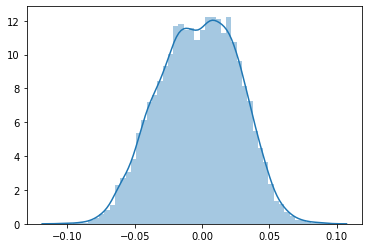

In [ ]:
residualDistribution(lnr_feats, lnr_labls, title=None)
